In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset_first = pd.read_csv("konut_verileri.csv")

In [3]:
deneme = dataset_first.copy()
df = dataset_first.copy()


In [4]:
deneme.head()


,Fiyat,Oda Sayısı,Metrekare,Bina Yaşı,Kat Durumu,Bina Konumu
0,1.245.000\nTL,2 + 1,90 m²,11 Yaşında,3. Kat,Ankara / Mamak / Zirvekent Mah.
1,1.245.000\nTL,3 + 1,125 m²,20 Yaşında,3. Kat,Ankara / Polatlı / Kurtuluş Mah.
2,1.249.000\nTL,3 + 1,120 m²,20 Yaşında,Kot 1,Ankara / Mamak / General Zeki Doğan Mah.
3,1.249.000\nTL,1 + 1,70 m²,25 Yaşında,Kot 2,Ankara / Keçiören / Çaldıran Mah.
4,1.249.000\nTL,2 + 1,88 m²,16 Yaşında,Bahçe Katı,Ankara / Sincan / Ahi Evran Mah.


In [5]:
deneme.isna().sum()


Fiyat           0
Oda Sayısı      0
Metrekare       0
Bina Yaşı       0
Kat Durumu     43
Bina Konumu     0
dtype: int64

In [6]:
# Fiyat sütunundan gereksiz karakterleri kaldırıp dönüştürme
df['Fiyat'] = df['Fiyat'].str.replace(r'\D', '', regex=True).astype(int)

# Oda Sayısı sütununda toplama işlemi yaparak sayıya çevirme
oda_sayisi = df['Oda Sayısı'].str.extract(r'(\d+)\s*\+\s*(\d+)').astype(float).fillna(0)
df['Oda Sayısı'] = oda_sayisi.sum(axis=1).astype(int)

# Metrekare sütunundan birimleri kaldırıp sayıya çevirme
df['Metrekare'] = df['Metrekare'].str.replace(r'[^\d]', '', regex=True).astype(int)

# Bina Yaşı sütununu dönüştürme
df['Bina Yaşı'] = df['Bina Yaşı'].str.extract(r'(\d+)').fillna(0).astype(int)

# Bina Konumu sütununu ayrıştırma
df[['Şehir', 'İlçe', 'Mahalle']] = df['Bina Konumu'].str.split(' / ', expand=True)
df.drop(columns=['Bina Konumu'], inplace=True)


In [7]:
df['Kat Durumu'] = df['Kat Durumu'].fillna(df['Kat Durumu'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1853 entries, 0 to 1852
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Fiyat       1853 non-null   int32 
 1   Oda Sayısı  1853 non-null   int32 
 2   Metrekare   1853 non-null   int32 
 3   Bina Yaşı   1853 non-null   int32 
 4   Kat Durumu  1853 non-null   object
 5   Şehir       1853 non-null   object
 6   İlçe        1853 non-null   object
 7   Mahalle     1853 non-null   object
dtypes: int32(4), object(4)
memory usage: 87.0+ KB


In [8]:
df['Bina Yaşı'] = df['Bina Yaşı'].astype('category').cat.codes
df['Kat Durumu'] = df['Kat Durumu'].astype('category').cat.codes
df['Şehir'] = df['Şehir'].astype('category').cat.codes
df['İlçe'] = df['İlçe'].astype('category').cat.codes
df['Mahalle'] = df['Mahalle'].astype('category').cat.codes


In [9]:
print(df.isna().sum())

Fiyat         0
Oda Sayısı    0
Metrekare     0
Bina Yaşı     0
Kat Durumu    0
Şehir         0
İlçe          0
Mahalle       0
dtype: int64


NORMALİZASYON ADIMLARI VE AYKIRI DEĞER ANALİZİ

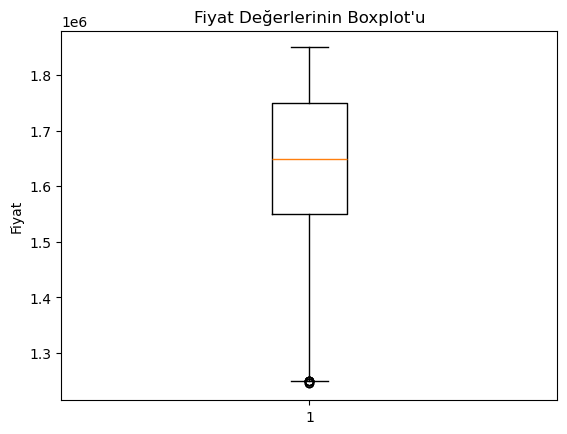

In [11]:

plt.boxplot(df['Fiyat'])
plt.title("Fiyat Değerlerinin Boxplot'u")
plt.ylabel("Fiyat")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Özellikler ve hedef değişkeni ayırma
X = df.drop(columns=['Fiyat'])  # Tüm sütunlar özellik
y = df['Fiyat']  # Fiyat hedef değişken

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sayısal verileri ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Random forest

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Random Forest modeli oluşturma ve eğitme
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
rf_y_pred = rf_model.predict(X_test)

# Performansı değerlendirme
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest R² Score: {rf_r2}")


Random Forest MSE: 20928173665.715675
Random Forest R² Score: 0.14955953671400868


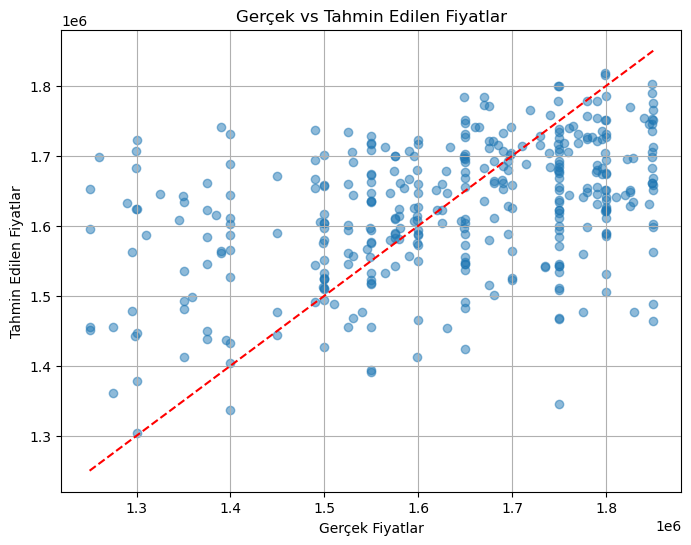

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Gerçek Fiyatlar")
plt.ylabel("Tahmin Edilen Fiyatlar")
plt.title("Gerçek vs Tahmin Edilen Fiyatlar")
plt.grid()
plt.show()

Lineer Regresyon


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Model oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Model performansını değerlendirme
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 24293980919.260414
R² Score: 0.012786078802336176


XGBoost 

In [19]:
!pip install xgboost

In [20]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# XGBoost modelini oluşturma
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Modeli eğitme
xgb_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
xgb_y_pred = xgb_model.predict(X_test)

# Model performansını değerlendirme
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print(f"XGBoost Mean Squared Error (MSE): {xgb_mse}")
print(f"XGBoost R² Score: {xgb_r2}")


XGBoost Mean Squared Error (MSE): 20297949687.564857
XGBoost R² Score: 0.17516941459984348
